<a href="https://colab.research.google.com/github/Akshaykumarmundrathi/HousePricePrediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load and Prepare Data , Preprocessing

1.1 import dependencies

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


1.2 Load Dataset and Clean

In [26]:
# Load data from CSV file
df = pd.read_csv('realest.csv')

# Listwise deletion for missing values in relevant columns
cols = ['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']
df_clean = df[cols].dropna().copy()


# 2. Visualizations
2.1 Scatter Plots for Each Predictor vs Price

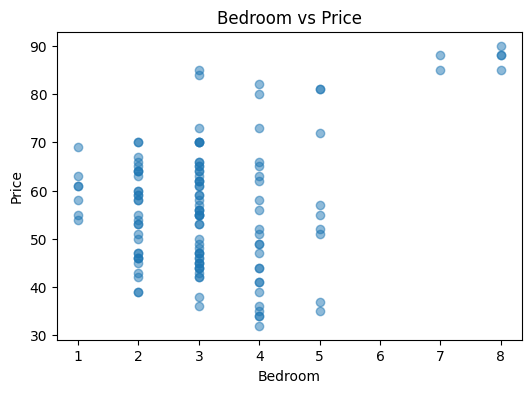

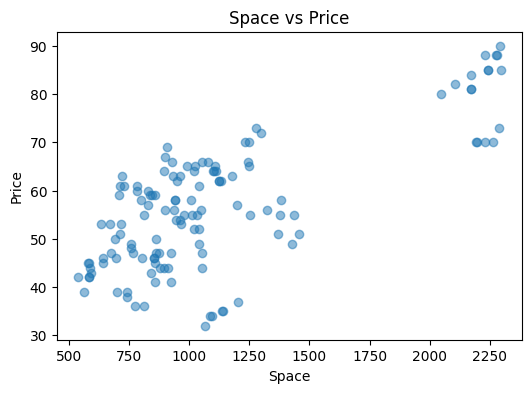

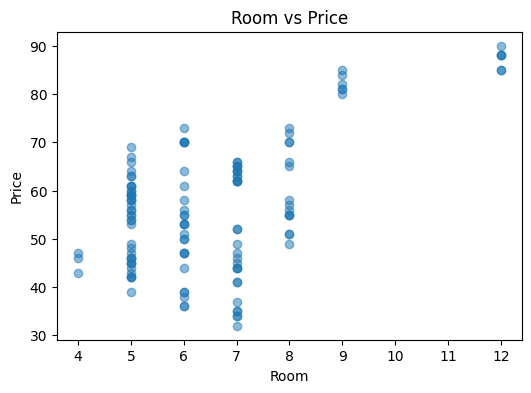

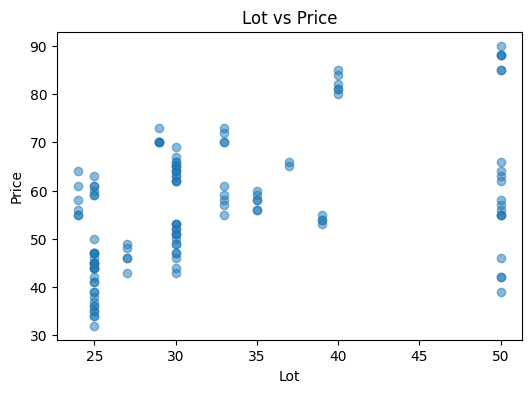

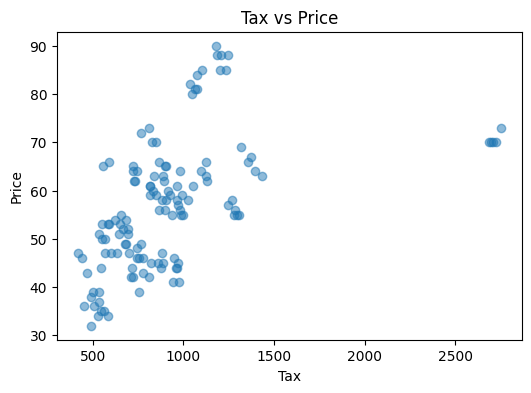

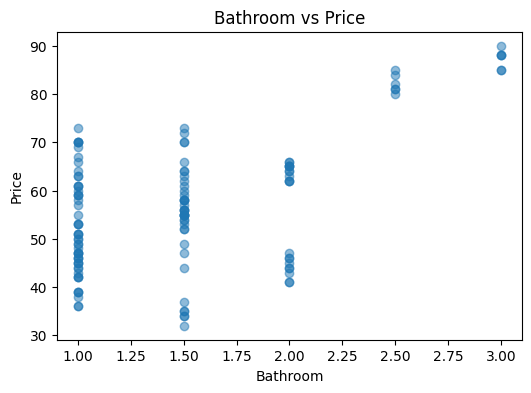

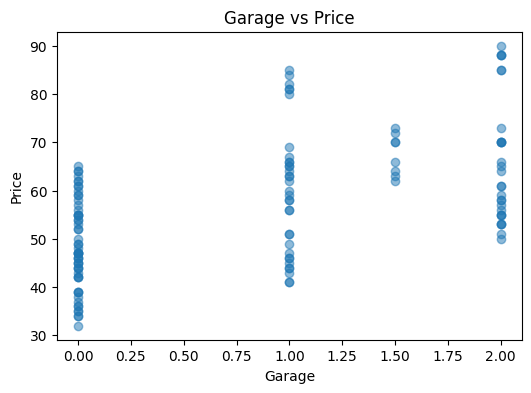

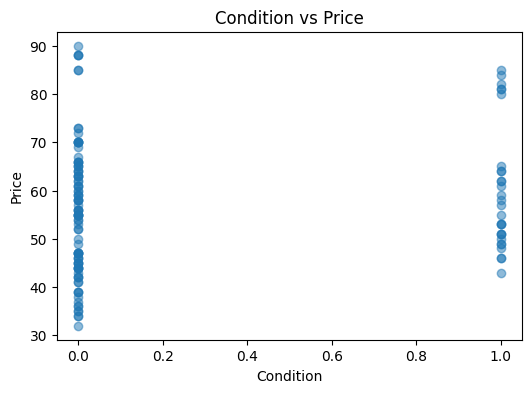

In [27]:

for col in ['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_clean[col], df_clean['Price'], alpha=0.5)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()


2.2 Correlation Heatmap

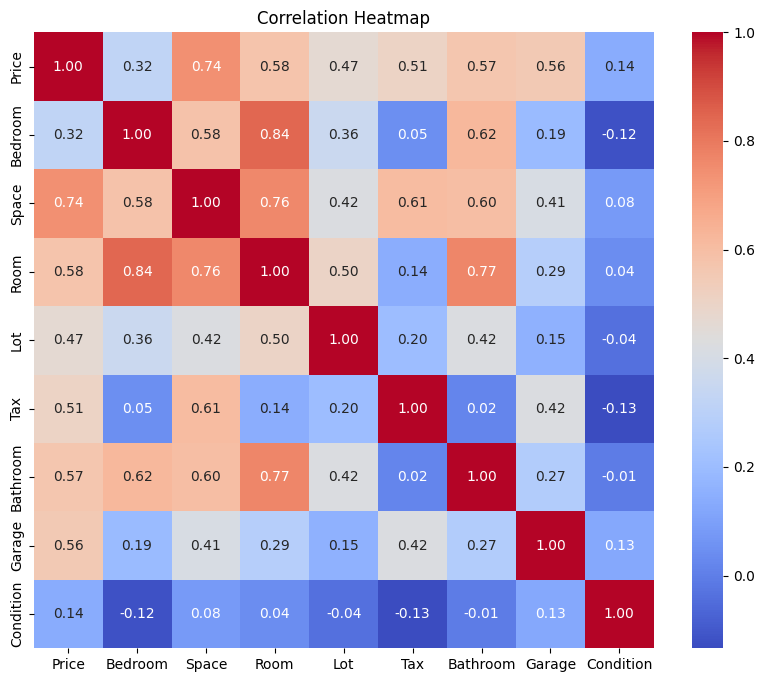

In [28]:

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



# 3. Model Building and Evaluation
3.1 Split Data

In [29]:

X = df_clean[['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']]
y = df_clean['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3.2 Fit Model

In [30]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

3.3 Predict and Calculate Errors

In [31]:

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Model Performance:')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error (MAE): ${mae:,.2f}')
print(f'Root Mean Squared Error (RMSE): ${rmse:,.2f}\n')


Model Performance:
R-squared: 0.70
Mean Absolute Error (MAE): $6.37
Root Mean Squared Error (RMSE): $7.59



3.4 Visualize Actual vs Predicted

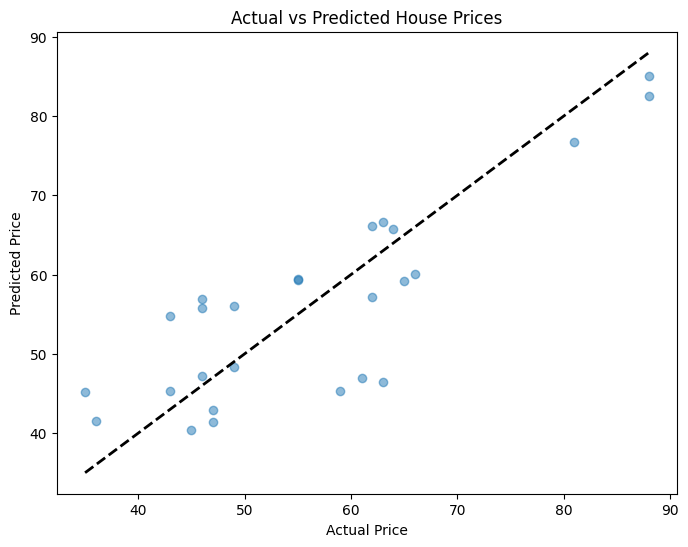

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


3.5 Visualize Residuals

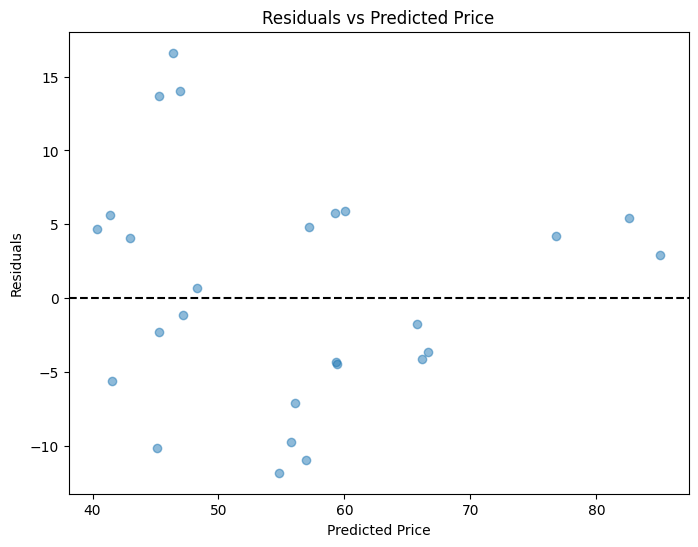

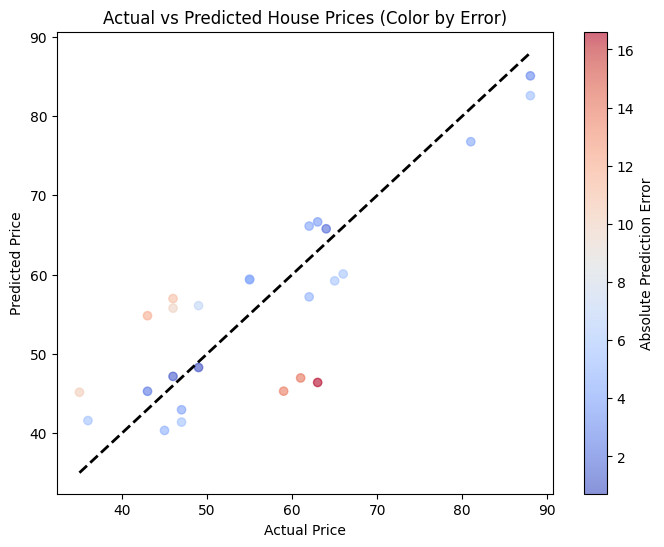

In [33]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()

# Color plot by absolute error
plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_test, y_pred, c=abs(residuals), cmap='coolwarm', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices (Color by Error)')
plt.colorbar(scatter, label='Absolute Prediction Error')
plt.show()


# 4. Prediction for Specific House

In [34]:
# house: Bedroom=3, Space=1500, Room=8, Lot=40, Tax=40000, Bathroom=2, Garage=1, Condition=0 (bad)
house_data = pd.DataFrame({
    'Bedroom': [3],
    'Space': [1500],
    'Room': [8],
    'Lot': [40],
    'Tax': [40000],
    'Bathroom': [2],
    'Garage': [1],
    'Condition': [0]
})
predicted_price = model.predict(house_data)[0]


print('\nPredicted Price for the House:')
print(f'${predicted_price:,.2f}')



Predicted Price for the House:
$199.58


# 5. Model Parameters

In [35]:
params = {'Intercept': model.intercept_}
for i, col in enumerate(X.columns):
    params[col] = model.coef_[i]

print('\nModel Parameters:')
for key, value in params.items():
    print(f'{key}: {value:.2f}')



Model Parameters:
Intercept: 21.77
Bedroom: -2.29
Space: 0.01
Room: 0.52
Lot: 0.28
Tax: 0.00
Bathroom: 7.29
Garage: 5.12
Condition: 1.90
